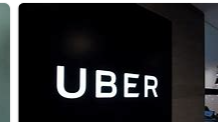

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("d:UberDataset.csv")
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
dataset.shape


(1156, 7)

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing
We have observed that the PURPOSE column contains many null values. As a solution, we will be replacing these null values with the "NOT" keyword. However, there may be other approaches that could be explored as well.





In [5]:
dataset['PURPOSE'].fillna("NOT", inplace=True)


# Converting the START_DATE and END_DATE columns to the datetime format in order to enable their use in analysis.





In [6]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
                                     errors='coerce')

# We will split the START_DATE column into two separate columns for date and time, and then categorize the time into one of four categories: Morning, Afternoon, Evening, and Night.





In [7]:
from datetime import datetime
 
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour
 
#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

# After creating the new columns, we can proceed to remove any rows that contain null values.





In [8]:
dataset.dropna(inplace=True)


# To ensure data integrity, removing duplicate rows from the dataset is essential. Please see the code below for how to accomplish this.





In [9]:
dataset.drop_duplicates(inplace=True)


# In this section, we will perform data visualization to understand and compare all columns.

To begin with, we will check the unique values in the columns of the dataset with object datatype.

In [10]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
 
unique_values = {}
for col in object_cols:
      unique_values[col] = dataset[col].unique().size



In [11]:
unique_values

{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

In [12]:
# plt.figure(figsize=(10,5))
 
# plt.subplot(1,2,1)
# sns.countplot(dataset['CATEGORY'])
# plt.xticks(rotation=90)
 
# plt.subplot(1,2,2)
# sns.countplot(dataset['PURPOSE'])
# plt.xticks(rotation=90)
# ValueError                                Traceback (most recent call last)
# Cell In[12], line 4
#       1 plt.figure(figsize=(10,5))
#       3 plt.subplot(1,2,1)
# ----> 4 sns.countplot(dataset['CATEGORY'])
#       5 plt.xticks(rotation=90)
#       7 plt.subplot(1,2,2)

# Now, we will be comparing the two different categories along with the PURPOSE of the user.



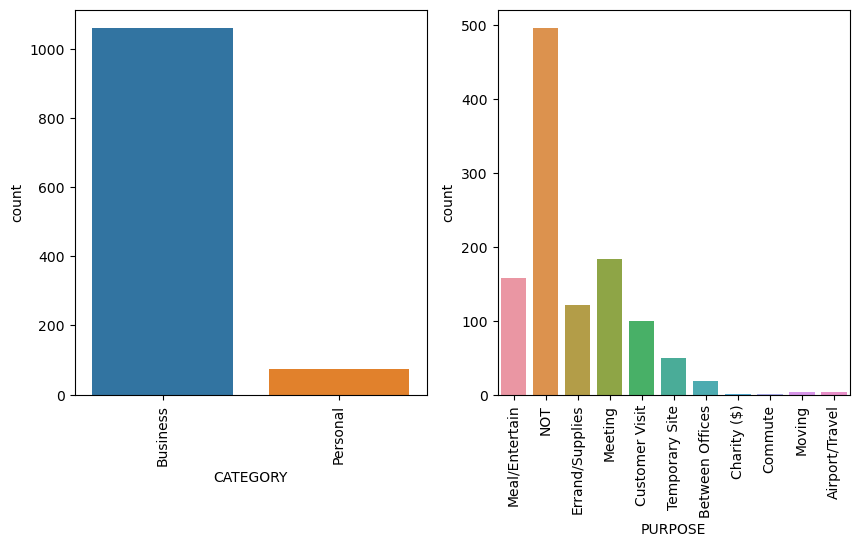

In [13]:
import seaborn as sns

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=dataset, x='CATEGORY')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data=dataset, x='PURPOSE')
plt.xticks(rotation=90)

plt.show()


In [18]:
# plt.figure(figsize=(10,5))
# sns.countplot(dataset['day-night'])
# plt.xticks(rotation=90)
# ValueError                                Traceback (most recent call last)
# Cell In[15], line 2
#       1 plt.figure(figsize=(10,5))
# ----> 2 sns.countplot(dataset['day-night'])
#       3 plt.xticks(rotation=90)

# File D:\CondaNote\lib\site-packages\seaborn\categorical.py:2943, in countplot(data, x, y, hue, order, hue_order, orient, color, palette, saturation, width, dodge, ax, **kwargs)
#    2940 elif x is not None and y is not None:
#    2941     raise ValueError("Cannot pass values for both `x` and `y`")
# -> 2943 plotter = _CountPlotter(
#    2944     x, y, hue, data, order, hue_order,
#    2945     estimator, errorbar, n_boot, units, seed,
#    2946     orient, color, palette, saturation,
#    2947     width, errcolor, errwidth, capsize, dodge
#    2948 )
#    2950 plotter.value_label = "count"
#    2952 if ax is None:

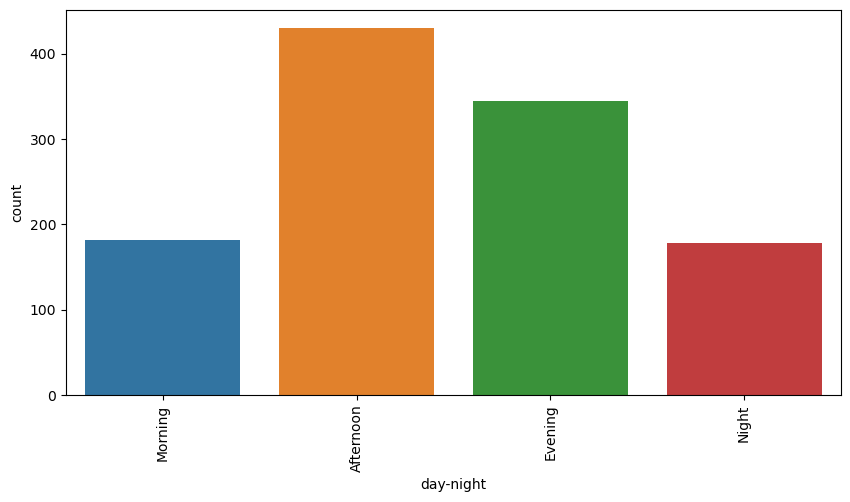

In [17]:
import seaborn as sns

plt.figure(figsize=(10,5))

sns.countplot(data=dataset, x='day-night')
plt.xticks(rotation=90)

plt.show()


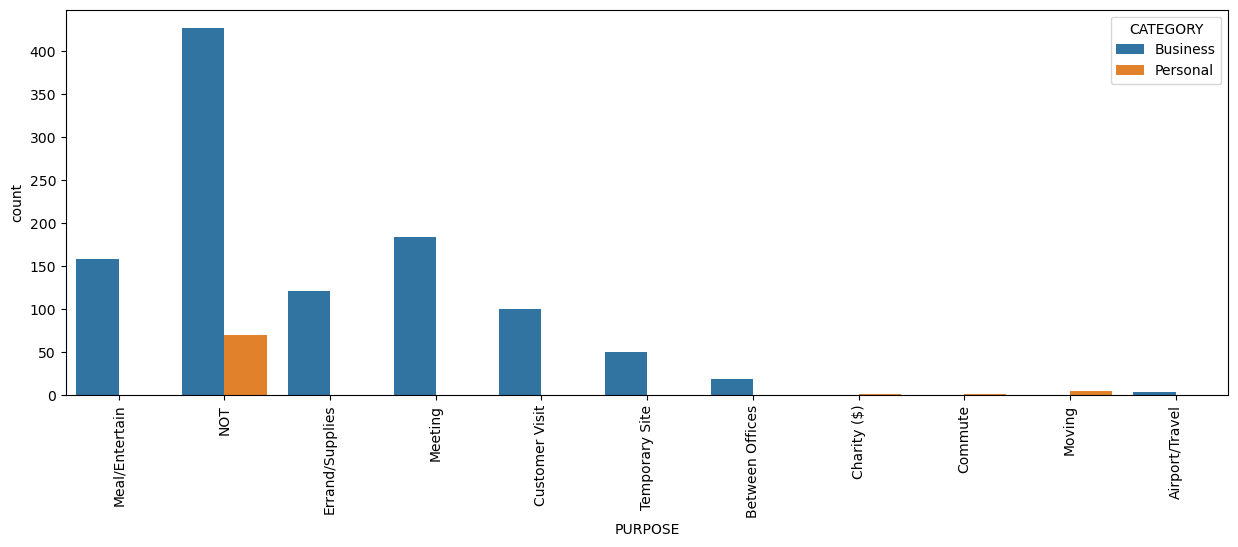

In [20]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

# The count-plots above provide the following insights:

The majority of the rides are booked for business purposes.
Most people book cabs for meetings and meal/entertainment purposes.
The most popular time for booking cabs is between 10am and 5pm (afternoon).

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# object_cols = ['CATEGORY', 'PURPOSE']
# OH_encoder = OneHotEncoder(sparse=False)
# OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
# OH_cols.index = dataset.index
# OH_cols.columns = OH_encoder.get_feature_names()
# df_final = dataset.drop(object_cols, axis=1)
# dataset = pd.concat([df_final, OH_cols], axis=1)
# AttributeError                            Traceback (most recent call last)
# Cell In[19], line 6
#       4 OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
#       5 OH_cols.index = dataset.index
# ----> 6 OH_cols.columns = OH_encoder.get_feature_names()
#       7 df_final = dataset.drop(object_cols, axis=1)
#       8 dataset = pd.concat([df_final, OH_cols], axis=1)

# AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names'

# As we have observed that the columns CATEGORY and PURPOSE hold significant importance in the dataset, we will now use OneHotEncoder to categorize them.





In [21]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(dataset[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)
df_final = dataset.drop(object_cols, axis=1)
dataset = pd.concat([df_final, OH_cols], axis=1)


D:\CondaNote\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# After that, we can now find the correlation between the columns using heatmap.



C:\Users\user\AppData\Local\Temp\ipykernel_4716\1039674243.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

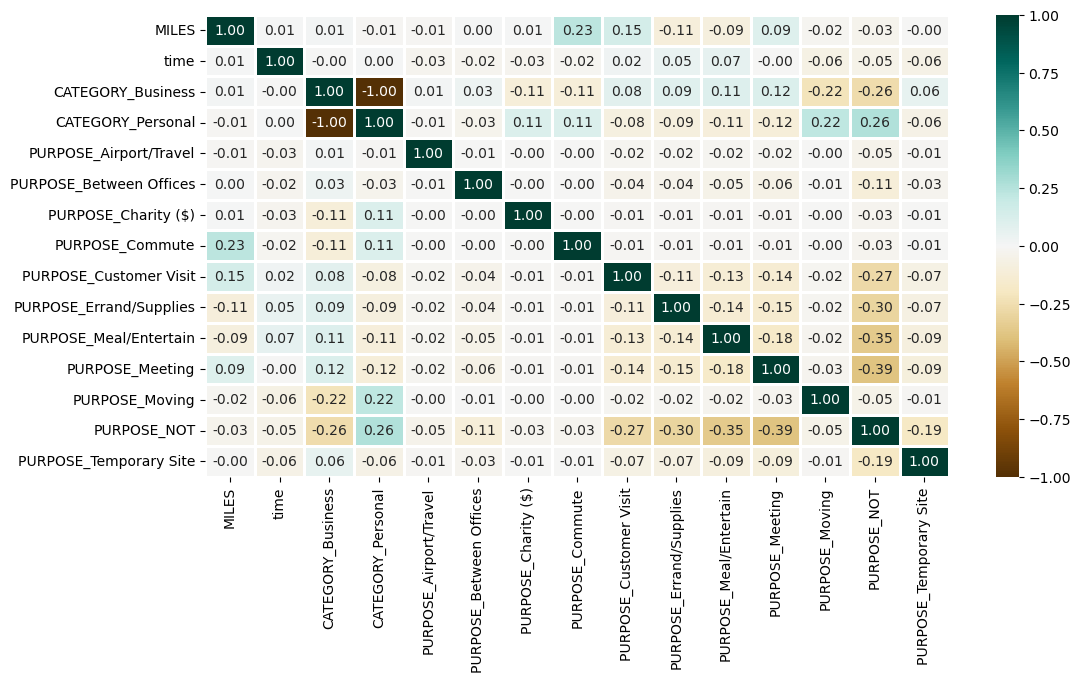

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

# The heatmap reveals that Business and Personal categories have a strong negative correlation, which confirms our earlier observation. Additionally, there isn't much correlation between the other features. Moving forward, we will visualize the data by month, following the same approach as before.

# Now, as we need to visualize the month data. This can we same as done before (for hours). 



[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

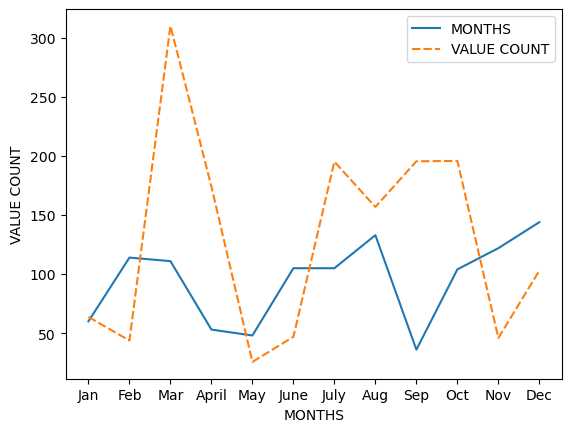

In [23]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)
 
mon = dataset.MONTH.value_counts(sort=False)
 
# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})
 
p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [29]:
# Insights from the above plot : 
# The counts are very irregular.
# Still its very clear that the counts are very less during Nov, Dec, Jan, which justifies the fact that  time winters are there in Florida, US.
# Visualization for days data.

In [24]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

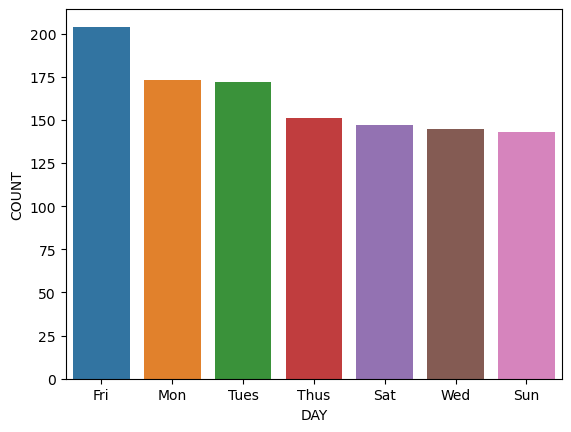

In [25]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')

In [30]:
# Now, let’s explore the MILES Column .

# We can use boxplot to check the distribution of the column.

<Axes: >

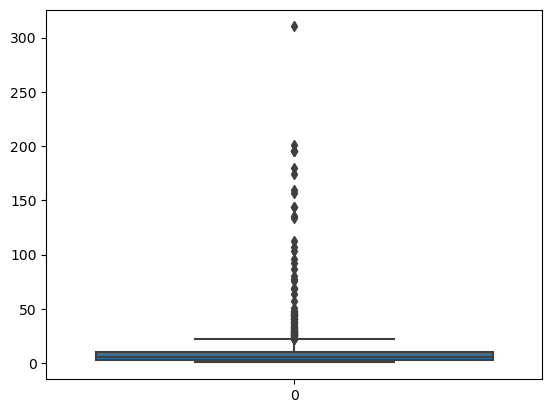

In [26]:
sns.boxplot(dataset['MILES'])


In [31]:
# As the graph is not clearly understandable. Let’s zoom in it for values lees than 100.



<Axes: >

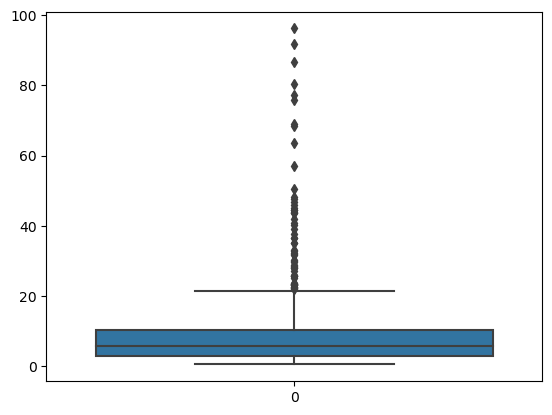

In [27]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])


In [32]:
# It’s bit visible. But to get more clarity we can use distplot for values less than 40.



C:\Users\user\AppData\Local\Temp\ipykernel_4716\615779499.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

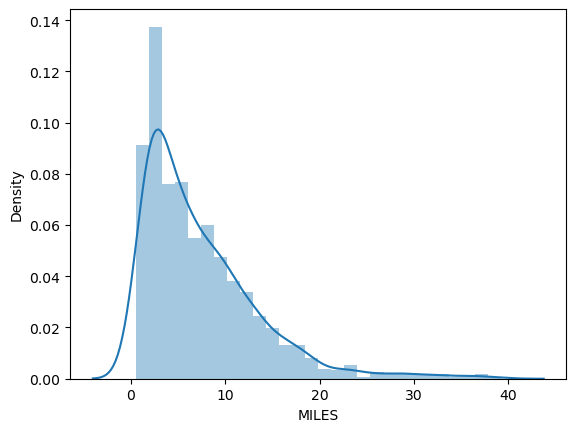

In [28]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])


# The following insights can be inferred from the above plots:

Majority of the cab bookings are for distances ranging from 4 to 5 miles.
People generally prefer cabs for distances less than 20 miles.
The number of cab bookings for distances greater than 20 miles is very low.